## Data Wrangling II

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
dataset = pd.read_csv('StudentsPerformance.csv')
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0


In [29]:
dataset.shape

(1000, 8)

In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   997 non-null    float64
 6   reading score                998 non-null    float64
 7   writing score                997 non-null    float64
dtypes: float64(3), object(5)
memory usage: 62.6+ KB


In [31]:
dataset.describe()

,math score,reading score,writing score
count,997.000000,998.000000,997.000000
mean,66.100301,69.158317,68.041123
std,15.169258,14.603794,15.205464
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,57.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


### Check for Missing Values

In [32]:
dataset.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     3
reading score                  2
writing score                  3
dtype: int64

### Filling Missing values by Mean

In [33]:
math_mean = dataset['math score'].mean()
dataset['math score'].fillna(math_mean, inplace=True)

### Filling Missing Values by interpolation

In [34]:
dataset['reading score']

0      72.0
1      90.0
2      95.0
3      57.0
4      78.0
       ... 
995    99.0
996    55.0
997    71.0
998    78.0
999    86.0
Name: reading score, Length: 1000, dtype: float64

In [35]:
dataset['reading score'].interpolate(inplace=True)

### Droping Missing Values

In [36]:
dataset.dropna(inplace=True)

In [37]:
dataset.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### Detecting Outlier using Box Plot 

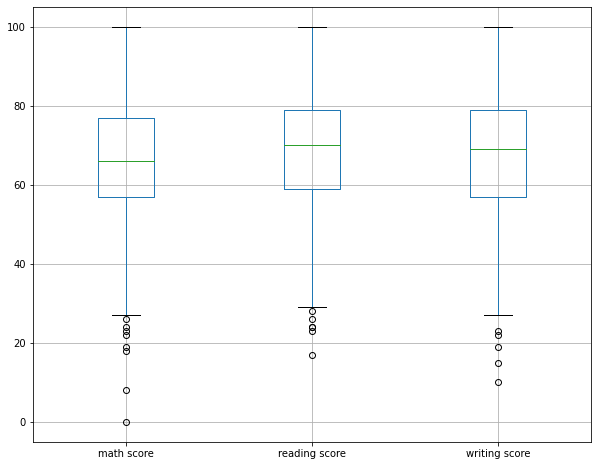

In [38]:
plt.figure(figsize=(10,8))
dataset.boxplot()
plt.show()

### Detecting Outlier using Z-Score

In [40]:
outliers=[]
def detect_outliers(data):
    
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [41]:
num_data = []
for ele in dataset.columns:
    if dataset[ele].dtype != 'object':
        num_data.append(ele)
print("Numeric Data :-> ", num_data)

Numeric Data :->  ['math score', 'reading score', 'writing score']


In [42]:
# Number outliers from each section
for ele in num_data:
    outlier = detect_outliers(dataset[ele])
    if len(outlier) > 0:
        print("Number of Outliers for", ele, ":--->", len(outlier))

Number of Outliers for math score :---> 4
Number of Outliers for reading score :---> 8
Number of Outliers for writing score :---> 12


### Detecting and Treating outlier using InterQunatile Range

In [43]:
#Function to find Lower Limit and Upper Limit
def outlier_limits(col):
  Q3, Q1 = np.percentile(col, [75, 25])
  IQR = Q3 - Q1
  UL = Q3 + 1.5*IQR
  LL = Q1 - 1.5*IQR
  return UL, LL

In [44]:
for ele in num_data:
    UL, LL = outlier_limits(dataset[ele])
    print(ele, "--->","Lower Limit :", round(LL), " | ","Upper Limit :", round(UL))
    dataset[ele] =   np.where(dataset[ele]>UL, 
                    UL, 
                    np.where(
                    dataset[ele]<LL,
                    LL,
                    dataset[ele]))

math score ---> Lower Limit : 27  |  Upper Limit : 107
reading score ---> Lower Limit : 29  |  Upper Limit : 109
writing score ---> Lower Limit : 24  |  Upper Limit : 112


## Data Transformation using log

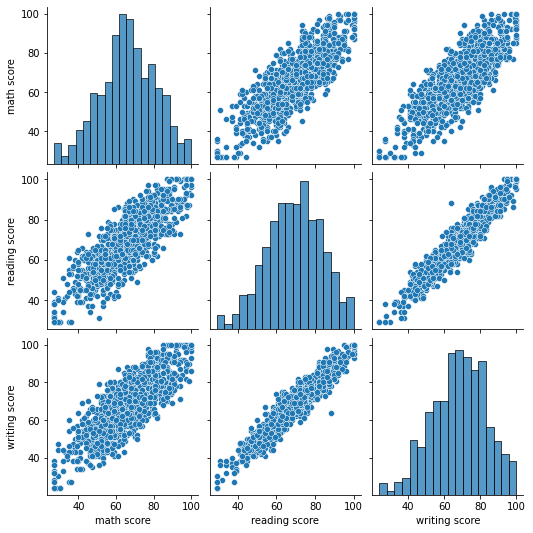

In [45]:
sns.pairplot(dataset)
plt.show()

In [46]:
new_dataset = pd.DataFrame()
new_dataset['math log'] = np.log10(dataset['math score'])
new_dataset['reading log'] = np.log10(dataset['reading score'])
new_dataset['writing log'] = np.log10(dataset['writing score'])
new_dataset.head()

,math log,reading log,writing log
0,1.857332,1.857332,1.869232
1,1.838849,1.954243,1.944483
2,1.954243,1.977724,1.968483
3,1.672098,1.755875,1.643453
4,1.880814,1.892095,1.875061


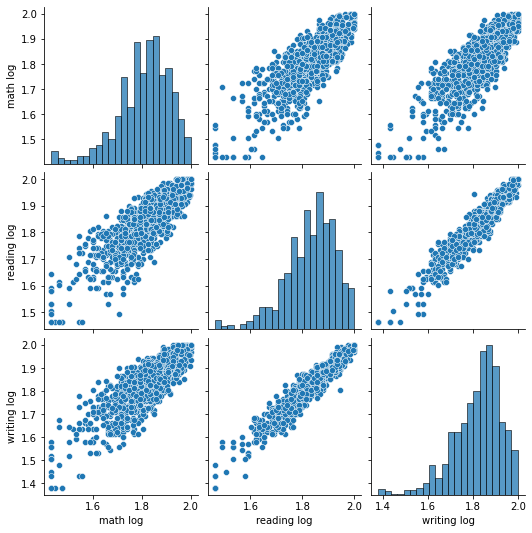

In [47]:
sns.pairplot(new_dataset)